<a href="https://colab.research.google.com/github/anilsah895/skin_diseases_detection/blob/master/sample_skinmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
Base_dir="gdrive/My Drive/Colab Notebooks/skin data/"
train_path = Base_dir+"train"
validation_path = Base_dir+"validation"

In [3]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
from keras import optimizers



Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.20))

'''model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))'''

model.add(Flatten())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(Dense(256, activation='linear'))
model.add(Dense(8, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)  

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
# Change the batchsize according to your system RAM
train_batchsize = 128
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(100, 100),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(100, 100),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

 
checkpoint_path = Base_dir+"weight{epoch:04d}.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpointer = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, verbose=1, save_weights_only=True,save_best_only=False,
                                                  period=5)
                                              
  # Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the model

history =model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1,
    callbacks = [checkpointer])




Found 5914 images belonging to 8 classes.
Found 1461 images belonging to 8 classes.
Epoch 1/50
46/46 [============================>.] - ETA: 9s - loss: 1.9327 - acc: 0.2376 

In [0]:
# Save the model
model.save('weight.hdf5')

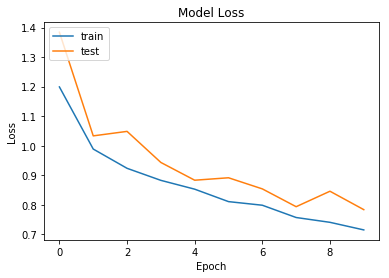

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

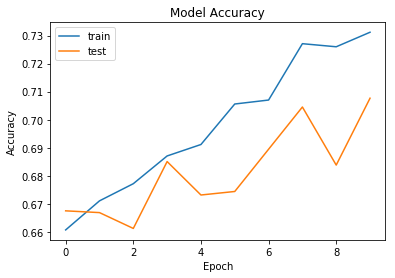

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()